In [61]:
import pandas as pd
import numpy as np
import pylab as plt

In [163]:
timeseries = pd.read_hdf("data/timeseries.h5")
tweets = pd.read_hdf("data/crypto_tweets.h5")
tracked_users = pd.read_hdf("data/")

data = timeseries.merge(tweets, on='tweetid').sort_values(['tweetid', 'timestamp'])
data['trel'] = np.concatenate(data.groupby('tweetid').apply(lambda df: np.arange(len(df))).values)

data = data.astype({"trel":'int' , 'open':'float'})
data['opennorm'] = np.concatenate(data.groupby('tweetid').apply(lambda df: df['open'].values / df['open'].max()).values)

data = data[['trel', 'symbol', 'currency', 'timestamp', 'trades', 'tweetid', 'username', 'posted_at', 'open', 'opennorm']]
data = data.astype({"trel":'int' , 'open':'float'})
data.head()

,trel,symbol,currency,timestamp,trades,tweetid,username,posted_at,open,opennorm
176028,0,"BTC, XBT, ₿",Bitcoin,1503082560000,1,898642104401842176,Satoshi Nakamoto,2017-08-18 20:25:48,4127.92,0.997931
176029,1,"BTC, XBT, ₿",Bitcoin,1503082620000,14,898642104401842176,Satoshi Nakamoto,2017-08-18 20:25:48,4127.92,0.997931
176030,2,"BTC, XBT, ₿",Bitcoin,1503082680000,6,898642104401842176,Satoshi Nakamoto,2017-08-18 20:25:48,4118.09,0.995554
176031,3,"BTC, XBT, ₿",Bitcoin,1503082740000,20,898642104401842176,Satoshi Nakamoto,2017-08-18 20:25:48,4124.71,0.997155
176032,4,"BTC, XBT, ₿",Bitcoin,1503082800000,17,898642104401842176,Satoshi Nakamoto,2017-08-18 20:25:48,4086.28,0.987864


In [152]:
from numpy import diff 
    
derivatives = data.groupby('tweetid').apply(lambda x: pd.DataFrame(diff(x[['opennorm']].values,
                                                                                n=1,
                                                                                axis=0
                                                                                ) ))


data = data[data.groupby('tweetid').cumcount(
    ascending=False) > 0]

data[['opennorm_diff']] = derivatives.set_index(data.index.values)
# dataframe[['vxf', 'vyf']] = vf_df.set_index(dataframe.index.values)



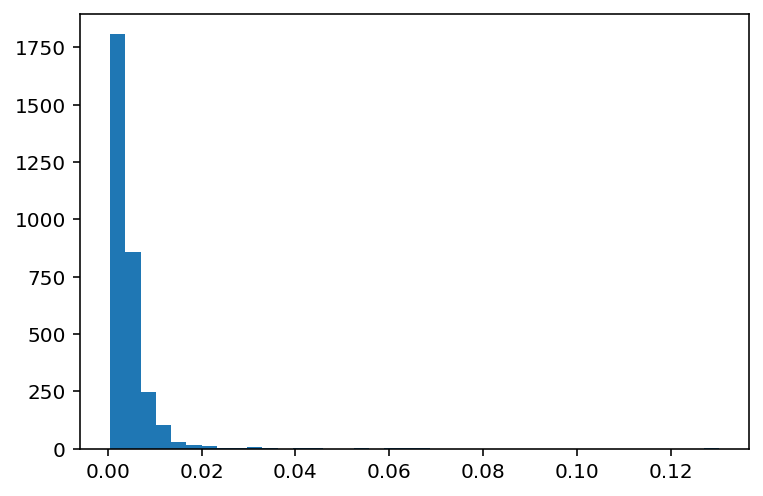

In [94]:
_ = plt.hist(data.groupby('tweetid').opennorm_diff.max(), bins=40)

In [125]:
def plot_timeseries(df, ax):
    
    plt.plot(df['trel'], df['opennorm'], ax)

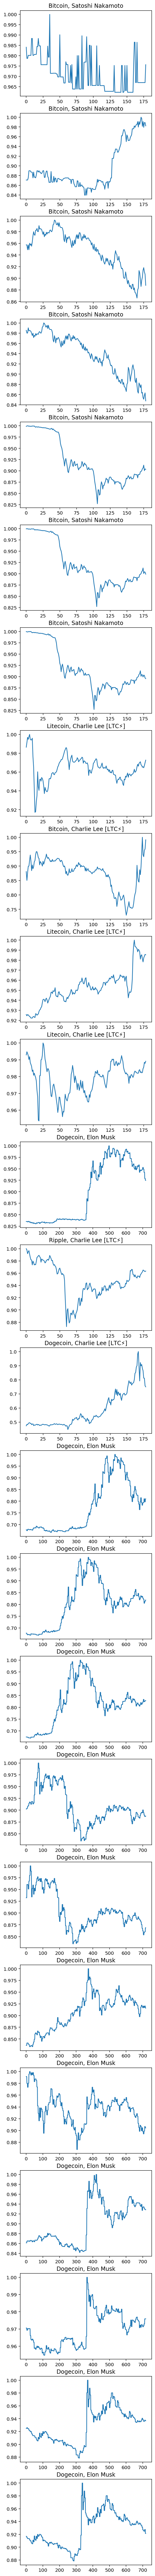

In [162]:
n=25



idcs = np.array(list(data.groupby('tweetid').opennorm_diff.max().sort_values()[-n:].index))

highest_candles = data.set_index('tweetid').loc[idcs]

f, axes = plt.subplots(n, 1, figsize=(5, 4*n))
axes = iter(axes)

def plot(df):
    
    ax = next(axes)
    
    ax.plot(df['trel'], df['opennorm'])
    
    ax.set_title("{}, {}".format(df['currency'].iloc[0], df['username'].iloc[0]))
    
highest_candles.groupby('tweetid').apply(lambda df: plot(df));

f.savefig("price_effect_of_tweets.pdf")


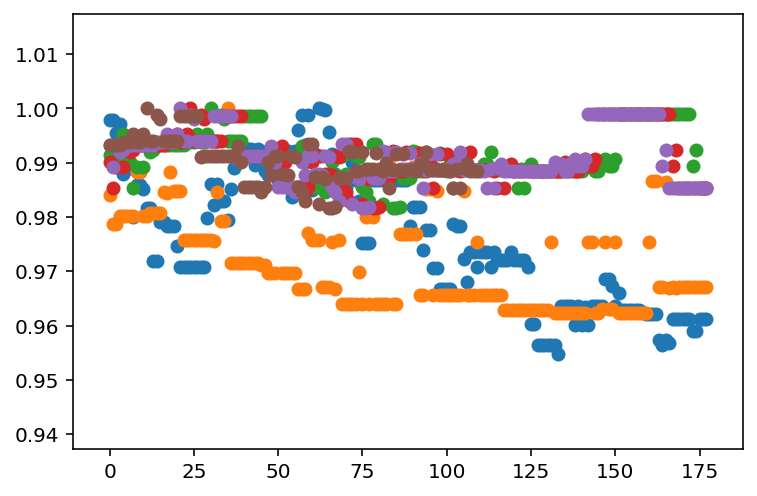

In [95]:
data.iloc[:1000].groupby('tweetid').apply(lambda x: plt.scatter(x['trel'], x['opennorm']));


In [44]:
data['trel'] = np.concatenate(data.groupby('tweetid').apply(lambda df: np.arange(len(df))).values)